In [21]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [22]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [24]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [25]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(autoload_with=engine)

In [26]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [30]:
# Save references to each table
measurement_ref = Base.classes.measurement
station_ref = Base.classes.station

In [31]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [32]:
# Get column names for 'measurement'
measurement_cols = inspector.get_columns('measurement')
print(f"{6*'#'} Measurement {6*'#'}")
for col in measurement_cols:
    print(col['name'], col['type'])

# Get column names for 'station'
station_cols = inspector.get_columns('station')
print(f"\n{8*'#'} Station {8*'#'}")
for col in station_cols:
    print(col['name'], col['type'])

###### Measurement ######
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

######## Station ########
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [33]:
# Find the most recent date in the data set.
latest_date = session.query(func.max(measurement_ref.date)).one()
latest_date

('2017-08-23',)

2016-08-22 00:00:00
            Date  Precipitation
0     2016-08-23            0.0
1     2016-08-23            0.5
2     2016-08-23            1.3
3     2016-08-23           17.8
4     2016-08-23            3.8
...          ...            ...
2016  2017-08-22           12.7
2017  2017-08-23            0.0
2018  2017-08-23            2.0
2019  2017-08-23            0.0
2020  2017-08-23           11.4

[2021 rows x 2 columns]


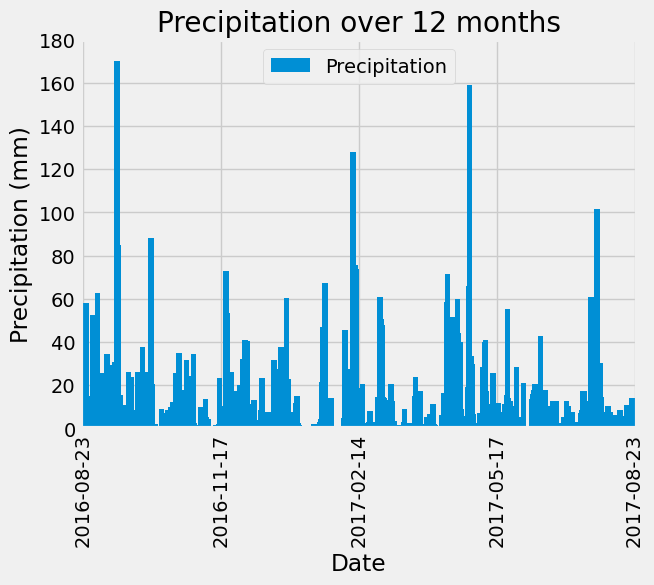

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date_string = latest_date[0].split('-')
dt_date = dt.datetime(
    int(date_string[0]),
    int(date_string[1]),
    int(date_string[2]))

# Calculate the date one year from the last date in data set.
year_ago = dt_date - dt.timedelta(days=366)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement_ref.date, measurement_ref.prcp).\
    filter(measurement_ref.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(precipitation, columns=['Date', 'Precipitation']).dropna(how='any')

# Sort the dataframe by date
sorted_prcp = prcp_df.sort_values(by=['Date']).reset_index(drop=True)
print(sorted_prcp)

# Use Pandas Plotting with Matplotlib to plot the data
sample = np.arange(
    start = 0,
    stop = len(sorted_prcp['Date']),
    step = int(len(sorted_prcp['Date'])/4))

x_ticks = []
for value in sample:
    x_ticks.append(sorted_prcp.loc[value, 'Date'])
x_ticks


bar_chart = sorted_prcp.plot(
    kind = 'bar',
    title = 'Precipitation over 12 months',
    xlabel = 'Date',
    ylabel = 'Precipitation (mm)',
    xticks = sample,
    width = 20,
    ylim = (0, 180))
bar_chart.set_xticklabels(labels = x_ticks)
bar_chart.legend(loc='upper center')

# sample = np.arange(0, len(sorted_prcp['Date']), 5)
# sample




# bar_chart.set_xticklabels(labels = ['2016-08-23'])
# x_axis_range = np.arange(len(sorted_prcp['Date']))
# plt.xticks(x_axis_range, labels=sorted_prcp['Date'])

In [35]:
sorted_prcp.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


Text(0, 0.5, 'mm')

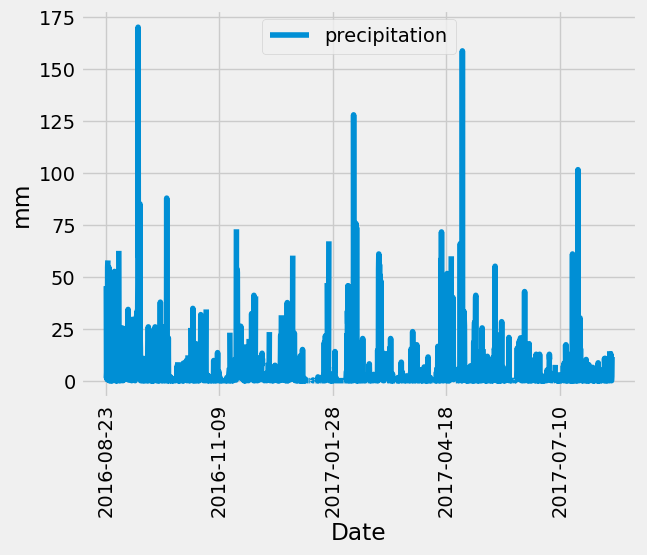

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(station_ref.id)).all()
total_stations

[(9,)]

In [37]:
station_data = session.query(station_ref).all()
for value in station_data:
    print(value.id)

0
1
2
3
4
5
6
7
8


In [38]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement_ref.station, func.count(measurement_ref.id)).\
    group_by(measurement_ref.station).\
    order_by(func.count(measurement_ref.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_temps = session.query(
    func.min(measurement_ref.tobs),
    func.max(measurement_ref.tobs),
    func.avg(measurement_ref.tobs)).\
    filter(measurement_ref.station == active_stations[0][0]).all()
active_temps

[(12.2, 29.4, 22.03582251082252)]

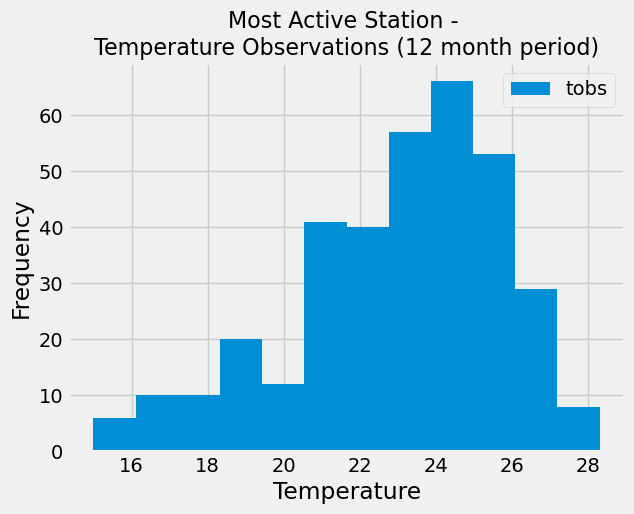

In [40]:
most_active = session.query(measurement_ref.tobs).\
    filter(measurement_ref.station == active_stations[0][0]).\
    filter(measurement_ref.date >= year_ago).all()

# Create DataFrame from query result
active_df = pd.DataFrame(most_active)

# Create histogram, where: bins=12
active_df.hist(bins=12, label='tobs')

# Add title, labels, and legend to the plot
plt.title("Most Active Station - \nTemperature Observations (12 month period)", fontsize=16)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [198]:
# result = [x for x in most_active]
result = [list(x)[0] for x in most_active]
result

[25.0,
 25.0,
 26.7,
 26.7,
 23.9,
 22.8,
 25.6,
 25.0,
 25.6,
 26.7,
 26.7,
 25.6,
 25.6,
 25.6,
 22.8,
 23.3,
 26.7,
 26.1,
 25.0,
 26.7,
 24.4,
 26.1,
 23.9,
 26.1,
 25.6,
 26.1,
 25.6,
 25.6,
 24.4,
 23.3,
 25.0,
 25.6,
 26.1,
 26.1,
 25.0,
 26.7,
 25.6,
 25.6,
 25.6,
 25.0,
 26.1,
 26.1,
 26.1,
 26.1,
 23.9,
 24.4,
 22.8,
 22.2,
 21.7,
 25.0,
 26.1,
 25.6,
 26.1,
 25.0,
 26.1,
 25.0,
 25.6,
 25.6,
 25.6,
 25.6,
 25.0,
 23.3,
 23.9,
 24.4,
 22.8,
 24.4,
 23.3,
 25.0,
 24.4,
 24.4,
 23.3,
 23.9,
 23.9,
 23.9,
 23.9,
 21.7,
 17.2,
 21.1,
 20.0,
 19.4,
 25.0,
 23.3,
 25.0,
 24.4,
 24.4,
 23.9,
 24.4,
 23.9,
 22.8,
 23.9,
 22.8,
 23.9,
 23.3,
 23.9,
 23.3,
 23.9,
 22.8,
 23.9,
 22.8,
 22.8,
 23.3,
 21.1,
 22.2,
 21.1,
 19.4,
 19.4,
 20.6,
 21.1,
 20.0,
 20.6,
 20.6,
 18.9,
 18.3,
 20.0,
 16.7,
 23.9,
 21.1,
 20.6,
 24.4,
 24.4,
 23.3,
 22.8,
 21.7,
 23.3,
 23.3,
 22.2,
 21.7,
 22.2,
 23.3,
 20.6,
 19.4,
 22.2,
 21.1,
 17.8,
 17.2,
 17.2,
 16.7,
 21.1,
 21.1,
 16.7,
 16.7,
 17.2,
 18.3,

Text(0.5, 4.183333333333314, 'Temperature')

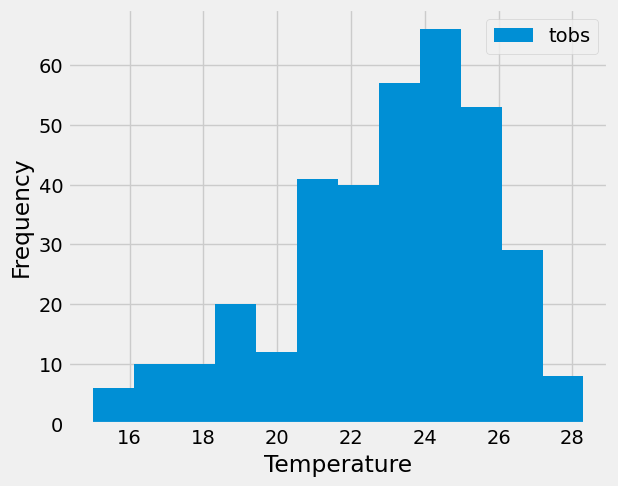

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()